#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
DATADIR = "./mnist/trainingSet"
CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]

#### Reading training data

In [3]:
training_data = []
for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array, class_num])
            except Exception as e:
                print(e)

In [4]:
training_data[0][0].shape

(28, 28)

In [5]:
len(training_data)

42000

In [6]:
#random.shuffle(training_data)

#### Creating model and layers

In [6]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters = 4, kernel_size = (5,5), activation='relu' , input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 4, kernel_size = (7,7), activation='relu'))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 4)         104       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 4)           788       
_________________________________________________________________
average_pooling2d_1 (Average (None, 3, 3, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
______________________________________________________

#### Separating X_train and y_train values

In [8]:
X_train = []
y_train = []
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1,28,28,1)
y_train = np.array(y_train)

In [9]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
X_train.shape

(42000, 28, 28, 1)

#### Checking the training data with random values

In [11]:
value1 = random.randint(0,42000)
print(value1)

10976


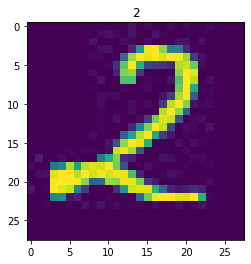

In [12]:
plt.imshow(X_train[value1])
plt.title(y_train[value1])
plt.show()

In [13]:
value2 = random.randint(0,42000)
print(value2)

4660


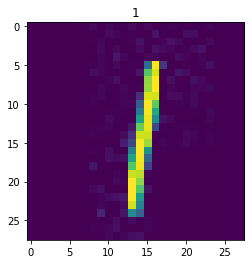

In [14]:
plt.imshow(X_train[value2])
plt.title(y_train[value2])
plt.show()

#### Fitting the model

In [15]:
model.fit(X_train, y_train, epochs = 1, batch_size = 1)

42000/42000 [==============================] - 139s 3ms/step - loss: 0.8289 - acc: 0.7515 2s - loss: 0.8361 - acc: 0.749 - 


#### Reading test data

In [16]:
X_test = []
TESTDATADIR = "./mnist/testSample"
for img in os.listdir(TESTDATADIR):
        try:
            img_array = cv2.imread(os.path.join(TESTDATADIR,img) ,cv2.IMREAD_GRAYSCALE)
            X_test.append(img_array)
        except Exception as e:
            print(e)

In [17]:
len(X_test)

350

In [18]:
X_test = np.array(X_test)

In [19]:
X_test.shape

(350, 28, 28)

#### Checking test data and predicting the values

In [29]:
test1 = random.randint(0,350)
print(test1)

295


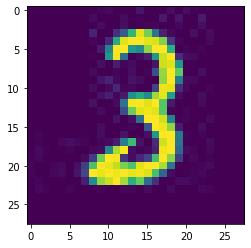

In [30]:
plt.imshow(X_test[test1])

In [32]:
test1 = X_test[test1].reshape(-1,28,28,1)
model.predict_classes(test1)

array([3], dtype=int64)

In [35]:
test2 = random.randint(0,350)
print(test2)

73


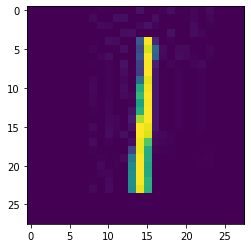

In [36]:
plt.imshow(X_test[test2])

In [37]:
test2 = X_test[test2].reshape(-1,28,28,1)
model.predict_classes(test2)

array([1], dtype=int64)